In [19]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy.sparse as sparse
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import call
from sklearn.metrics import mean_squared_error
df = pd.read_csv("C:/Users/Carla/Documents/Untitled Folder/AMLAS/ml-latest-small/ml-latest-small/ratings.csv")
from math import sqrt
from tqdm import tqdm
import math

In [20]:
uniqueMovies = df["movieId"].unique()
user = df["userId"].unique()


<AxesSubplot:>

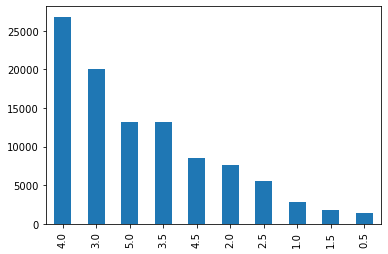

In [21]:
fig, ax = plt.subplots()
df['rating'].value_counts().plot(ax=ax, kind='bar')

In [22]:
data = np.zeros((uniqueMovies.shape[0],2))

for i in range(uniqueMovies.shape[0]):
    data[i,0] = int(i)
    data[i,1] = uniqueMovies[i]
    
    
movieData = pd.DataFrame(data, columns = ['newId', 'movieId'])
movieData

def MovieIndx(df,id):
    x = df.loc[df["movieId"] == id]
    y = x.iat[0,0]
    return y

def queryUser(df,id):
    
    return df.loc[df["userId"] == id]


def queryMovie(df,id):
    
    
    return df.loc[df["movieId"] == id]

def revMovieIndx(df,id):
    x = df.loc[df["newId"] == id]
    y = x.iat[0,1]

    return y


In [6]:
queryUser(df,3)
queryMovie(df,3)
MovieIndx(movieData,3)

x = revMovieIndx(movieData,1)

movieData
x

3.0

In [7]:
train = df

In [24]:
def fit(train,n_factors,n_iters,movieData):
    
    
 
    lambda_1 = 1
    tau = 0.01
    lr = 0.05
    
    n_users, n_movies = len(train["userId"].unique()),len(train["movieId"].unique())
    user_factors = np.random.normal(0,sqrt(lambda_1),size = (n_factors,n_users))
    movie_factors = np.random.normal(0,sqrt(lambda_1),size = (n_factors,n_movies))
    
    
    mse_record = []
    
    its = 0
    
    for i in range(n_iters):
        
        movie_factors, user_factors,rmse = updates(train,movie_factors,user_factors,lr)

        
        mse_record = np.append(mse_record,rmse)

        its = its + 1


    return mse_record


mse = fit(train,10,100,movieData)

ValueError: x and y must have same first dimension, but have shapes (5,) and (100,)

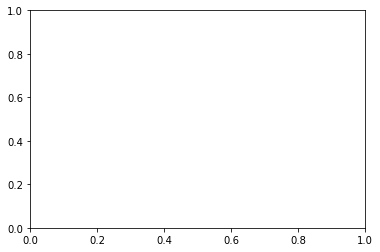

In [25]:
x =np.linspace(0,5,5)
plt.plot(x,mse)
mse


In [23]:
def updates(df,movie_factors,user_factors,lr):
    
   
    cum_error =0
    c = 0
    for row in df.itertuples(index = False):
        hold_user_factors = np.zeros([user_factors.shape[0],1])
        hold_movie_factors = np.zeros([user_factors.shape[0],1])
        
        y_true = row.rating
        user = row.userId-1
        movie = int(MovieIndx(movieData,row.movieId))
        
        c = c +1
        uf = np.reshape(user_factors[:,user],(user_factors.shape[0],1))
        mf = np.reshape(movie_factors[:,movie],(user_factors.shape[0],1))
        
        y_pred = uf.T@mf
        
        hold_user_factors[:,0] = user_factors[:,user]
        hold_movie_factors[:,0] = movie_factors[:,movie]
        
        error = y_true - y_pred
        
#         for i in range(user_factors.shape[0]):
            
#             hold_user_factors = user_factors[i,user]
#             hold_movie_factors = movie_factors[i,movie]
#             movie_factors[i,movie] = hold_movie_factors + alpha*(2*error*hold_user_factors - beta*hold_movie_factors)
#             user_factors[i,user] = hold_user_factors + alpha*(2*error*hold_movie_factors - beta*hold_user_factors)
        
        movie_factors[:,movie] = hold_movie_factors[:,0]+lr*error*hold_user_factors[:,0].T
        user_factors[:,user] = hold_user_factors[:,0] + lr*error*hold_movie_factors[:,0].T
        
        cum_error = cum_error + (y_true - y_pred)**2
        rmse = sqrt((1/c)*cum_error)
        
#         for i in range(user_factors.shape[0]):
#             cum_error = cum_error + (beta/2) * (user_factors[i,user]**2+ movie_factors[i,movie]**2)
        
        
    return movie_factors, user_factors,rmse

In [ ]:
def updates1(df,movie_factors,user_factors,lr):

    cum_error =0
    c = 0
    for row in df.itertuples(index = False):
        hold_user_factors = np.zeros([user_factors.shape[0],1])
        hold_movie_factors = np.zeros([user_factors.shape[0],1])
        
        y_true = row.rating
        user = row.userId-1
        movie = int(MovieIndx(movieData,row.movieId))
        
        c = c +1
        l_uf = np.log(np.reshape(user_factors[:,user],(user_factors.shape[0],1)))
        l_mf = np.log(np.reshape(movie_factors[:,movie],(user_factors.shape[0],1)))
        
        y_pred = uf.T@mf
        
        hold_user_factors[:,0] = user_factors[:,user]
        hold_movie_factors[:,0] = movie_factors[:,movie]
        
        error = y_true - y_pred
        
#         for i in range(user_factors.shape[0]):
            
#             hold_user_factors = user_factors[i,user]
#             hold_movie_factors = movie_factors[i,movie]
#             movie_factors[i,movie] = hold_movie_factors + alpha*(2*error*hold_user_factors - beta*hold_movie_factors)
#             user_factors[i,user] = hold_user_factors + alpha*(2*error*hold_movie_factors - beta*hold_user_factors)
        
        movie_factors[:,movie] = hold_movie_factors[:,0] +2*lr*error*hold_user_factors[:,0].T
        user_factors[:,user] = hold_user_factors[:,0] +2*lr*error*hold_movie_factors[:,0].T
        
        cum_error = cum_error + (y_true - y_pred)**2
    
        
#         for i in range(user_factors.shape[0]):
#             cum_error = cum_error + (beta/2) * (user_factors[i,user]**2+ movie_factors[i,movie]**2)
        
        
    return movie_factors, user_factors,cum_error